<a href="https://colab.research.google.com/github/ryan121406/ATM/blob/main/P119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/whitehatjr/datasets/master/C119/titanic.csv')
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Survived
0,1,3,1,34.5,1,0,0
1,2,1,0,47.0,1,0,1
2,3,3,0,62.0,0,0,1
3,4,1,0,27.0,1,0,1
4,5,3,1,22.0,0,0,0
...,...,...,...,...,...,...,...
886,887,2,1,34.0,0,0,0
887,888,1,0,5.0,0,0,1
888,889,3,0,52.0,1,2,0
889,890,1,1,36.0,0,0,1


In [21]:
X = df[['Age','Pclass']]
Y = df['Survived']
features = ['Age','Pclass']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 2)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier(max_depth=3)
DTC.fit(x_train,y_train)

y_prediction = DTC.predict(x_test)
accuracy = accuracy_score(y_test,y_prediction)
print(accuracy)

0.664179104477612


In [23]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus

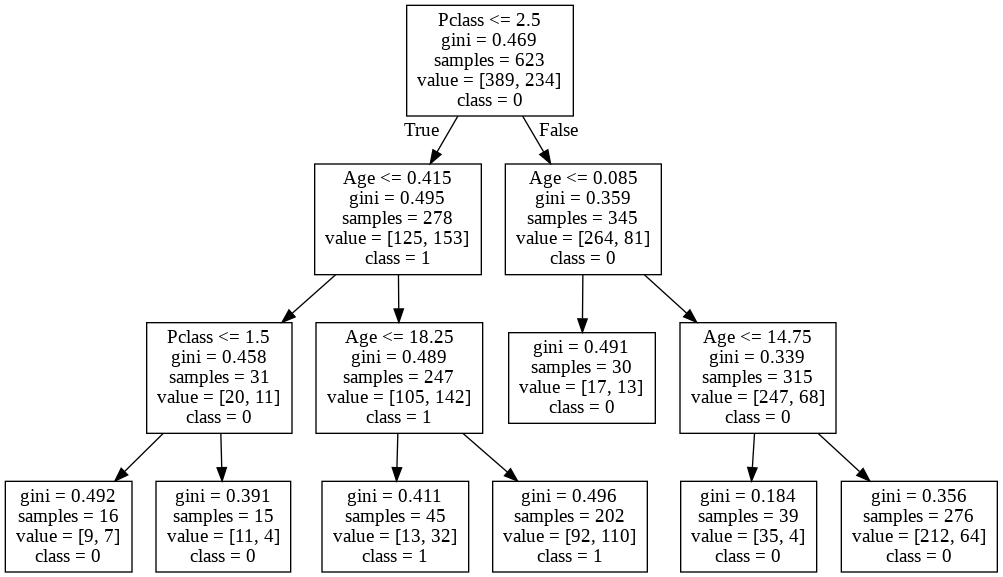

In [24]:
text_data = StringIO()
export_graphviz(DTC,out_file=text_data,feature_names=features,class_names = ['0','1'])

graph = pydotplus.graph_from_dot_data(text_data.getvalue())
graph.write_png('Decision Tree.png')
Image(graph.create_png())